In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit_textbook.tools import array_to_latex
from qiskit.visualization import plot_bloch_multivector, plot_histogram

In [2]:
#Sumador simple

In [3]:
#Construimos el circuito
qc = QuantumCircuit(4,2)

#Ponemos los dos primeros en 1
qc.x(0)
qc.x(1)
qc.barrier()

#Aplicamos el equivalente a XOR
qc.cx(0,2)
qc.cx(1,2)

#Aplicamos el equivalente a AND en el orden indicado
qc.ccx(0,1,3)
qc.barrier()

#Salidas en ambas compuertas
qc.measure(2,0)
qc.measure(3,1)

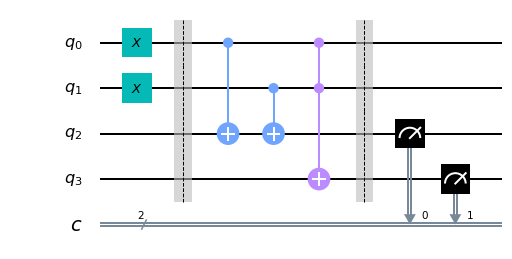

In [4]:
#Dibujo del circuito
qc.draw(output = 'mpl')

In [5]:
#Statevector
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

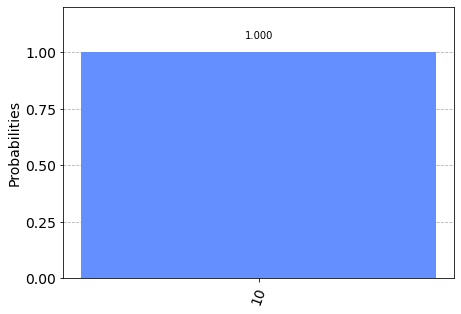

In [6]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend, shots = 1)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)